<a href="https://colab.research.google.com/github/phanikiran99/kaggle/blob/master/EDA_Covid19India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import numpy as np
import requests

#plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
api = 'https://api.covid19india.org/data.json'
resp = requests.get(api)

In [177]:
caseTimeSeries = pd.DataFrame(resp.json()['cases_time_series'])
stateWise = pd.DataFrame(resp.json()['statewise'])
tested = pd.DataFrame(resp.json()['tested'])

In [178]:
testPlots = tested[['totalindividualstested','totalpositivecases','totalsamplestested','updatetimestamp']]
testPlots = testPlots.apply(lambda x: x.str.strip()).replace('', np.nan)
testPlots = testPlots.fillna(method='ffill')

In [179]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=testPlots['updatetimestamp'], y=testPlots['totalindividualstested'],name='Total Tested'))
fig.add_trace(go.Scatter(x=testPlots['updatetimestamp'],y=testPlots['totalpositivecases'],name='Total Positve cases'))
fig.update_layout(title_text="India Tested vs Positive Cases",xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='#FFF')
fig.show()

In [180]:
eventTimeline ={'What':['First Case','First Death','LockDown 1.0','LockDown 2.0','LockDown 3.0','LockDown 4.0','Unlock 1.0'],
'When':['30 January','12 March','25 March','14 April','01 May','17 May','01 June']}
from dateutil import parser
delta = []
for value in eventTimeline['When']:
  delta.append((parser.parse(value) - parser.parse('30 January')).days)
eventTimeline['delta'] = delta

In [181]:
pd.DataFrame(eventTimeline)

,What,When,delta
0,First Case,30 January,0
1,First Death,12 March,42
2,LockDown 1.0,25 March,55
3,LockDown 2.0,14 April,75
4,LockDown 3.0,01 May,92
5,LockDown 4.0,17 May,108
6,Unlock 1.0,01 June,123


In [209]:
shapes=[
        # 1st highlight before lockdown 1.0
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0=0,
            y0=0,
            x1=55,
            y1=1,
            fillcolor="LightCyan",
            opacity=0.8,
            layer="below",
            line_width=0,
        ),
        # 2nd highlight till lockdow 2.0
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=55,
            y0=0,
            x1=75,
            y1=1,
            fillcolor="LightBlue",
            opacity=0.8,
            layer="below",
            line_width=0,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=75,
            y0=0,
            x1=92,
            y1=1,
            fillcolor="Crimson",
            opacity=0.5,
            layer="below",
            line_width=0,),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=92,
            y0=0,
            x1=108,
            y1=1,
            fillcolor="Crimson",
            opacity=0.6,
            layer="below",
            line_width=0,),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=108,
            y0=0,
            x1=123,
            y1=1,
            fillcolor="Crimson",
            opacity=0.7,
            layer="below",
            line_width=0,),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=123,
            y0=0,
            x1=140,
            y1=1,
            fillcolor="Crimson",
            opacity=0.9,
            layer="below",
            line_width=0,)
    ]

In [210]:
(caseTimeSeries['totalconfirmed'].map(int)-(caseTimeSeries['totalrecovered'].map(int)+ caseTimeSeries['totaldeceased'].map(int))).iloc[-1]

178297

In [214]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalconfirmed'], name='Total Confirmed',marker_color='Grey'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalrecovered'], name='Total Recovered',marker_color='Grey'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalconfirmed'].map(int)-(caseTimeSeries['totalrecovered'].map(int)+ caseTimeSeries['totaldeceased'].map(int))
                                          , name='Total Active',marker_color='Crimson',mode='lines+text'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totaldeceased'], name='Total Deceased',marker_color='Grey'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyconfirmed'], name='Daily Confirmed'))
# fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailydeceased'], name='Daily Deceased'))
# fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyrecovered'], name='Daily Recovered'))
for i in range(len(eventTimeline['When'])):
  fig.add_annotation(x=eventTimeline['delta'][i],
                     y=eventTimeline['delta'][i]*1000,
                     text=eventTimeline['What'][i])

fig.add_annotation(x=caseTimeSeries['date'].iloc[-1],
                   y=caseTimeSeries['totalconfirmed'].map(int).max(),
                   text='Confirmed')

fig.add_annotation(x=caseTimeSeries['date'].iloc[-1],
                   y=caseTimeSeries['totalrecovered'].map(int).max(),
                   text='Recovered')

fig.add_annotation(x=caseTimeSeries['date'].iloc[-1],
                   y=caseTimeSeries['totaldeceased'].map(int).max(),
                   text='Deceased')

fig.add_annotation(x=caseTimeSeries['date'].iloc[-1],
                   y=(caseTimeSeries['totalconfirmed'].map(int)-(caseTimeSeries['totalrecovered'].map(int)+ caseTimeSeries['totaldeceased'].map(int))).iloc[-1],
                   text='Active',font={'color':'Crimson'})

fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-30
))
fig.update_layout(barmode='stack',xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='#FFF',shapes=shapes,showlegend=False,hovermode='x')
fig.update_layout(title='Covid19 Timeline in India',height=450)
fig.show()

In [174]:
import plotly
help(plotly)

Help on package plotly:

NAME
    plotly - https://plot.ly/python/

DESCRIPTION
    Plotly's Python API allows users to programmatically access Plotly's
    server resources.
    
    This package is organized as follows:
    
    Subpackages:
    
    - plotly: all functionality that requires access to Plotly's servers
    
    - graph_objs: objects for designing figures and visualizing data
    
    - matplotlylib: tools to convert matplotlib figures
    
    Modules:
    
    - tools: some helpful tools that do not require access to Plotly's servers
    
    - utils: functions that you probably won't need, but that subpackages use
    
    - version: holds the current API version
    
    - exceptions: defines our custom exception classes

PACKAGE CONTENTS
    _docstring_gen
    _version
    _widget_version
    animation
    basedatatypes
    basewidget
    callbacks
    colors
    config
    conftest
    dashboard_objs
    data (package)
    exceptions
    express (package)
    fig

In [ ]:
pctChange = pd.DataFrame({'date':caseTimeSeries['date'],'totalconfirmed':caseTimeSeries['totalconfirmed'],'pct_change':caseTimeSeries['totalconfirmed'].map(int).pct_change().mul(100).round(2)})

In [ ]:
pctChange['cumul_pct'] = pctChange['pct_change'].cumsum()

In [ ]:
p=1
rates = []
for i in range(100):
  if p > caseTimeSeries['totalconfirmed'].map(int).max():
    break
  else:
    rates.append(p)
    p = p *2

In [ ]:
rates

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072]

In [ ]:
def doubling_rate(lst):
  # rates = rates
  tf = []
  for val in lst:
    try:
      if val >= rates[0]:
        # print (val, rates[0])
        rates.pop(0)
        
        tf.append(True)
      else:
        tf.append(False)
    except IndexError:
      # print (rates,len(rates))
      # print ('exception')
      tf.append(False)
  return tf

In [ ]:
pctChange['double'] = doubling_rate(pctChange['totalconfirmed'].map(int))

In [ ]:
pctChangenoDup = pctChange.drop_duplicates('cumul_pct',keep='last')

In [ ]:
pctChangenoDup['double'] = doubling_rate(pctChange.drop_duplicates('cumul_pct',keep='last')['cumul_pct'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
doublingData = pctChange[pctChange['double']]

In [ ]:
doublingData.reset_index()['index'].diff().fillna(0).to_list()

[0.0,
 3.0,
 29.0,
 2.0,
 1.0,
 2.0,
 4.0,
 6.0,
 3.0,
 4.0,
 5.0,
 3.0,
 4.0,
 6.0,
 8.0,
 10.0,
 11.0,
 13.0]

In [ ]:
doublingData['doubleRate'] = doublingData.reset_index()['index'].diff().fillna(0).to_list()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
doublingData

,date,totalconfirmed,pct_change,cumul_pct,double,doubleRate
0,30 January,1,NaN,NaN,True,0.0
3,02 February,2,100.00,100.00,True,3.0
32,02 March,5,66.67,216.67,True,29.0
34,04 March,28,366.67,603.34,True,2.0
35,05 March,30,7.14,610.48,True,1.0
37,07 March,34,9.68,623.49,True,2.0
41,11 March,71,12.70,705.23,True,4.0
47,17 March,146,15.87,781.92,True,6.0
50,20 March,256,29.29,844.12,True,3.0
54,24 March,571,14.89,933.47,True,4.0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=doublingData['date'],y=doublingData['doubleRate'], name='DoublingRate of Cases'))
fig.add_trace(go.Scatter(x=doublingData['date'],y=doublingData['doubleRate'], name='DoublingRate of Cases'))
fig.add_trace(go.Scatter(x=doublingData['date'],y=doublingData['totalconfirmed'].map(int).map(np.log), name='Total Cases LogScale'))
fig.update_layout(title='Doubling Rate of Cases in India ' + str(doublingData['doubleRate'].iloc[-1]))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=pctChange['date'], y=pctChange['pct_change'], name='Percentage Change'))
fig.add_trace(go.Scatter(x=pctChange['date'], y=pctChange['cumul_pct'], name='Cumulative %'))
fig.add_trace(go.Scatter(x=pctChange['date'], y=pctChange['totalconfirmed'].map(int).div(100), name='Total Cases in Hundreds'))
fig.show()

In [ ]:
import plotly.express as px
# df = px.data.gapminder()
px.line(caseTimeSeries, x="date", y="totalconfirmed", animation_frame="date", 
            color="date", hover_name="date")
           #log_x=True, #size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
fig=go.Figure(data=[go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyconfirmed'], name='Daily Confirmed'),
              go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailydeceased'], name='Daily Deceased'),
                   go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyrecovered'], name='daily Receovered')]
              )

fig.update_layout(barmode='stack')
fig.show()


In [ ]:
caseTimeSeries = caseTimeSeries.astype(int, errors='ignore')

In [ ]:
caseTimeSeries['dailyconfirmed'] = caseTimeSeries.dailyconfirmed.apply(lambda x:int(x))

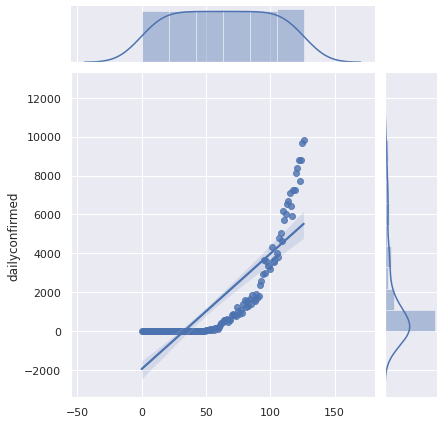

In [ ]:
sns.jointplot(x=caseTimeSeries.index,y='dailyconfirmed',data=caseTimeSeries,kind='reg')

In [ ]:
stateapi = 'https://api.covid19india.org/states_daily.json'
stateData = requests.get(stateapi).json()
stateTested = '	https://api.covid19india.org/state_test_data.json'
stateTestData = requests.get(stateTested).json()

In [ ]:
stateTestData.keys()

dict_keys(['states_tested_data'])

In [ ]:
stateDf = pd.DataFrame(stateData['states_daily'])
stateTestData = pd.DataFrame(stateTestData['states_tested_data'])

In [ ]:
confirmed_trend = stateDf[stateDf['status'] == 'Confirmed']
recovery_trend =stateDf[stateDf['status'] == 'Recovered']
recovery_trend =stateDf[stateDf['status'] == 'Deceased']

In [ ]:
state_ut = list(set(confirmed_trend.columns) - set(['status','tt','date']))

In [ ]:
import math
fig = go.Figure()
for col in confirmed_trend.columns:
  if col in state_ut:
    fig.add_trace(go.Scatter(x=confirmed_trend['date'], y= confirmed_trend[col], name=col))
  else:
    pass
fig.show()


In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=11d553c5af87e9f2071a4eff2aaae78472871dc0286db6ebbfc6435d8831dd2a
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
# stateTestData.loc[stateTestData.groupby(by='updatedon')['state','testpositivityrate','testspermillion','totaltested'].idxmax()]

In [ ]:
import pandasql as ps

In [ ]:
query = """select * from stateTestData a where updatedon = (select max(updatedon) from stateTestData b where a.state = b.state)"""

In [ ]:
stateTestLatest = ps.sqldf(query, locals())

In [ ]:
stateDf.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
# stateDfConfirmed = stateDf[['ap','date','status']]
stateDfConfirmed = stateDf[stateDf['status'] == 'Confirmed'].fillna(0).replace('',0)
stateDfRecovered = stateDf[stateDf['status'] == 'Recovered'].fillna(0).replace('',0)
stateDfDeceased = stateDf[stateDf['status'] =='Deceased'].fillna(0).replace('',0)

In [ ]:
stateDf.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [ ]:
stateTotalConfirmed =[] 
stateTotalDeceased =[]
stateTotalRecovered =[]
listStates = []
for col in stateDf:
    if col not in ['date','status']:
        listStates.append(col)
#         print (col)
        stateTotalConfirmed.append(np.sum(stateDfConfirmed[col].apply(lambda x: int(x))))
        stateTotalDeceased.append(np.sum(stateDfDeceased[col].apply(lambda x: int(x))))
        stateTotalRecovered.append(np.sum(stateDfRecovered[col].apply(lambda x:int(x))))

In [ ]:
data = {'State':listStates, 'Confirmed':stateTotalConfirmed, 'Deceased':stateTotalDeceased, 'Recovered':stateTotalRecovered}

In [ ]:
fullData  = pd.DataFrame(data=data)

In [ ]:
fullData['Decease%'] = round((fullData['Deceased']/fullData['Confirmed'])*100,2)
fullData['Recover%'] = round((fullData['Recovered']/fullData['Confirmed'])*100,2)
fullData['Active%'] = round(((fullData['Confirmed'] -(fullData['Recovered']+fullData['Deceased']))/fullData['Confirmed'])*100,2)

In [ ]:
#fullData[fullData['Confirmed'] > 100].sort_values(by='Active%', ascending=False).head(10)

In [ ]:
#fullData[fullData['Confirmed'] > 100].sort_values(by='Decease%', ascending=False).head(20).reset_index()

In [ ]:
#fullData[fullData['Confirmed'] > 100].sort_values(by='Recover%', ascending=False).head(20).reset_index()

In [ ]:
#fullData.sort_values(by='Active%', ascending=False)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=fullData['State'], y=fullData['Decease%'],marker_color='orange', name='Deceased %'))
fig.add_trace(go.Bar(x=fullData['State'], y=fullData['Recover%'],marker_color='green', name='Recovery %'))
fig.update_layout(barmode='stack', title='Deceased & Recovery %')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['ap'], name='AP Confirmed Cases'))
fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['kl'], name='Kerala Confirmed Cases'))
fig.add_trace(go.Scatter(x=stateDfRecovered['date'], y=stateDfRecovered['ap'], name='AP Recovered Cases'))
fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['tg'], name='TG Confirmed Cases'))
# fig.add_trace(go.Bar(x=stateDfConfirmed['date'], y=stateDfConfirmed['ap'], name='Confirmed Cases AP'))
fig.show()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 263kB/s 
     |████████████████████████████████| 10.9MB 47.2MB/s 


In [ ]:
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series

In [ ]:
#geoData = read_file(r'C:\Users\phani\Documents\Learn\learn\geoplots\maps-master\States\Admin2.shp')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Admin2.cpg to Admin2.cpg
Saving Admin2.dbf to Admin2.dbf
Saving Admin2.prj to Admin2.prj
Saving Admin2.shp to Admin2.shp
Saving Admin2.shp.xml to Admin2.shp.xml
Saving Admin2.shx to Admin2.shx


In [ ]:
geoData = read_file('Admin2.shp')
geoList = geoData.sort_values(by='ST_NM').ST_NM.unique()

In [ ]:
!ls

Admin2.cpg  Admin2.prj	Admin2.shp.xml	sample_data
Admin2.dbf  Admin2.shp	Admin2.shx


In [ ]:
len(listStates)

39

In [ ]:
dict ={}
for i,_ in enumerate(listStates):
    try:
        dict[_] = geoList[i]
    except IndexError:
        dict[_] = ""

In [ ]:
dict = {'an': 'Andaman & Nicobar Island',
 'ap': 'Andhra Pradesh',
 'ar': 'Arunanchal Pradesh',
 'as': 'Assam',
 'br': 'Bihar',
 'ch': 'Chandigarh',
 'ct': 'Chhattisgarh',
 'dd': 'Dadara & Nagar Havelli',
 'dl': 'NCT of Delhi',
 'dn': 'Daman & Diu',
 'ga': 'Goa',
 'gj': 'Gujarat',
 'hp': 'Himachal Pradesh',
 'hr': 'Haryana',
 'jh': 'Jharkhand',
 'jk': 'Jammu & Kashmir',
 'ka': 'Karnataka',
 'kl': 'Kerala',
 'la': '',
 'ld': 'Lakshadweep',
 'mh': 'Maharashtra',
 'ml': 'Meghalaya',
 'mn': 'Manipur',
 'mp': 'Madhya Pradesh',
 'mz': 'Mizoram',
 'nl': 'Nagaland',
 'or': 'Odisha',
 'pb': 'Puducherry',
 'py': 'Punjab',
 'rj': 'Rajasthan',
 'sk': 'Sikkim',
 'tg': 'Telangana',
 'tn': 'Tamil Nadu',
 'tr': 'Tripura',
 'tt': '',
 'up': 'Uttar Pradesh',
 'ut': 'Uttarakhand',
 'wb': 'West Bengal'}

In [ ]:
fullData['ST_NM'] = fullData['State'].map(dict)

In [ ]:
geoFullData  = geoData.merge(fullData[['Decease%','ST_NM','Recover%','Active%']], on='ST_NM', how='outer')

In [ ]:
geoFullData = geoFullData.dropna(subset=['geometry'])

In [ ]:
geoFullData['coords'] = geoFullData['geometry'].apply(lambda x: x.representative_point().coords[:])
geoFullData['coords'] = [coords[0] for coords in geoFullData['coords']]

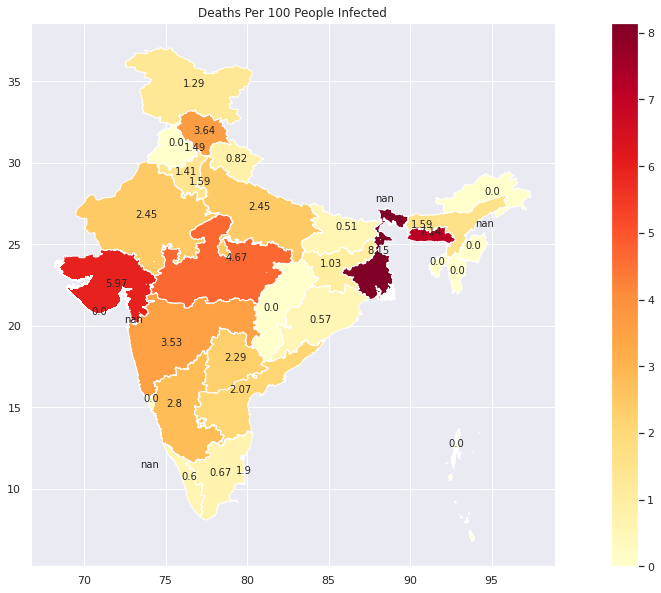

In [ ]:
geoFullData.plot(figsize=(20,10), column='Decease%', legend=True,cmap='YlOrRd');

for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Decease%'],xy=row['coords'], horizontalalignment='center')
    
plt.title('Deaths Per 100 People Infected');

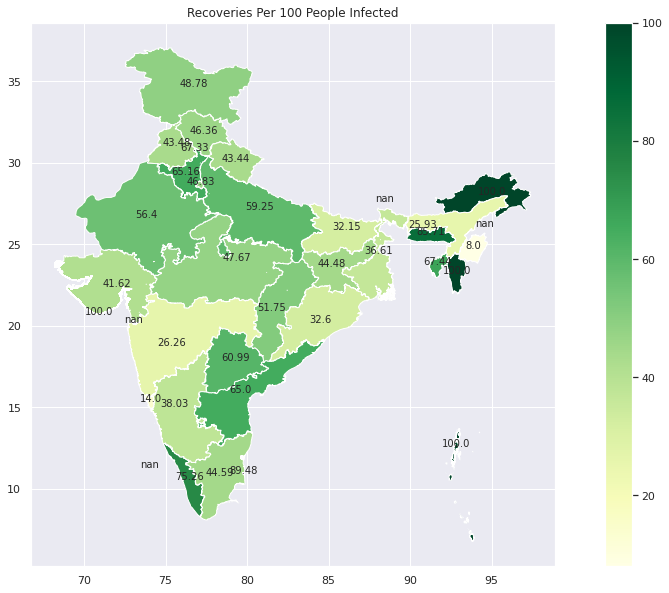

In [ ]:
geoFullData.plot(figsize=(18,10), column='Recover%', legend=True,cmap='YlGn');
for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Recover%'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Recoveries Per 100 People Infected');

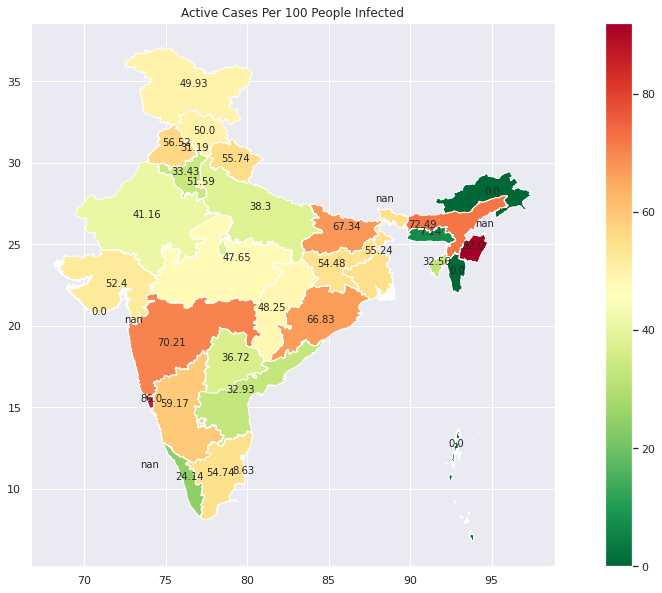

In [ ]:
geoFullData.plot(figsize=(18,10), column='Active%', legend=True,cmap='RdYlGn_r');
for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Active%'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Active Cases Per 100 People Infected');

In [ ]:
stateTestLatest = ps.sqldf(query, locals())
stateTestLatest = stateTestLatest[['positive','state','testpositivityrate','testspermillion','totaltested','updatedon']]

In [ ]:
stateTestLatest.columns=['positive','ST_NM','testpositivityrate','testspermillion','totaltested','updatedon']

In [ ]:
set(stateTestLatest['ST_NM']) - set(geoData['ST_NM'])

{'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Jammu and Kashmir',
 'Ladakh'}

In [ ]:
set(geoData['ST_NM'])- set(stateTestLatest['ST_NM'])

{'Andaman & Nicobar Island',
 'Arunanchal Pradesh',
 'Dadara & Nagar Havelli',
 'Daman & Diu',
 'Jammu & Kashmir',
 'Lakshadweep',
 'NCT of Delhi'}

In [ ]:
state_dict_full ={'Andaman and Nicobar Islands':'Andaman & Nicobar Island',
 'Arunachal Pradesh':'Arunanchal Pradesh',
 'Delhi':'NCT of Delhi',
 'Jammu and Kashmir':'Jammu & Kashmir',
 'Ladakh':'Ladakh'}

In [ ]:
# stateTestData

In [ ]:
stateTestLatest['ST_NM'] = stateTestLatest['ST_NM'].replace(state_dict_full).fillna(0)

In [ ]:
stateTestLatest = stateTestLatest.replace('',np.nan).fillna(0)

In [ ]:
testGeo = geoData.merge(stateTestLatest, how='outer', on='ST_NM')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=testGeo['ST_NM'],y=testGeo['totaltested']))

In [ ]:
for col in testGeo:
  try:
    testGeo[col] = testGeo.apply(lambda x:  int(x))
  except:
    pass

In [ ]:
cols = ['positive', 'ST_NM', 'testpositivityrate', 'testspermillion',
       'totaltested', 'updatedon']
testGeo[cols] = testGeo[cols].fillna(0)

In [ ]:
testGeo['totaltested'] =testGeo['totaltested'].apply(lambda x:int(x))

In [ ]:
testGeo = testGeo.drop(36)

In [ ]:
testGeo['coords'] = testGeo['geometry'].apply(lambda x: x.representative_point().coords[:])
testGeo['coords'] = [coords[0] for coords in testGeo['coords']]

AttributeError: ignored

KeyError: ignored

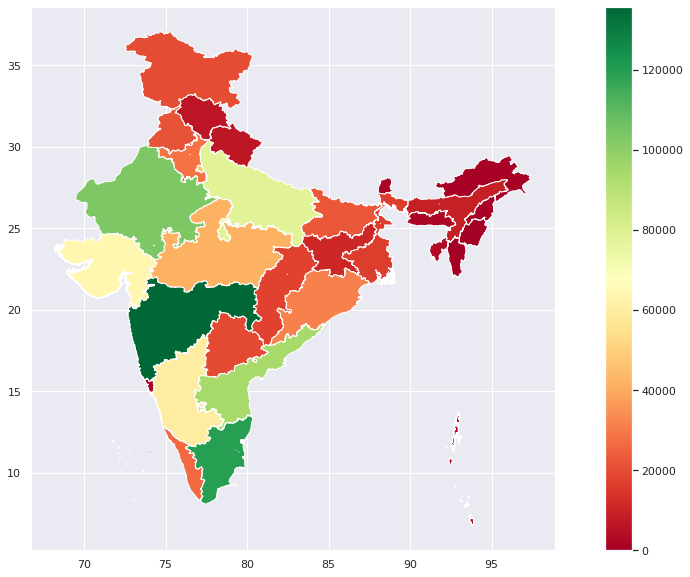

In [ ]:
testGeo.plot(figsize=(18,10), column='totaltested', legend=True,cmap='RdYlGn');
for idx, row in testGeo.iterrows():
    plt.annotate(s=row['totaltested'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Total Tested by State');

In [ ]:
geoFullData[['ST_NM', 'Decease%', 'Recover%', 'Active%']].sort_values(by='Active%', ascending=False)

,ST_NM,Decease%,Recover%,Active%
19,Manipur,0.00,8.00,92.00
8,Goa,0.00,14.00,86.00
2,Assam,1.59,25.93,72.49
18,Maharashtra,3.53,26.26,70.21
3,Bihar,0.51,32.15,67.34
34,Odisha,0.57,32.60,66.83
14,Karnataka,2.80,38.03,59.17
25,Punjab,0.00,43.48,56.52
32,Uttarakhand,0.82,43.44,55.74
33,West Bengal,8.15,36.61,55.24


# Basic Time Series

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
import statsmodels.api as sm
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
y = stateDfRecovered['ap'].apply(lambda x: int(x))
y.index = pd.to_datetime(stateDfRecovered['date'])

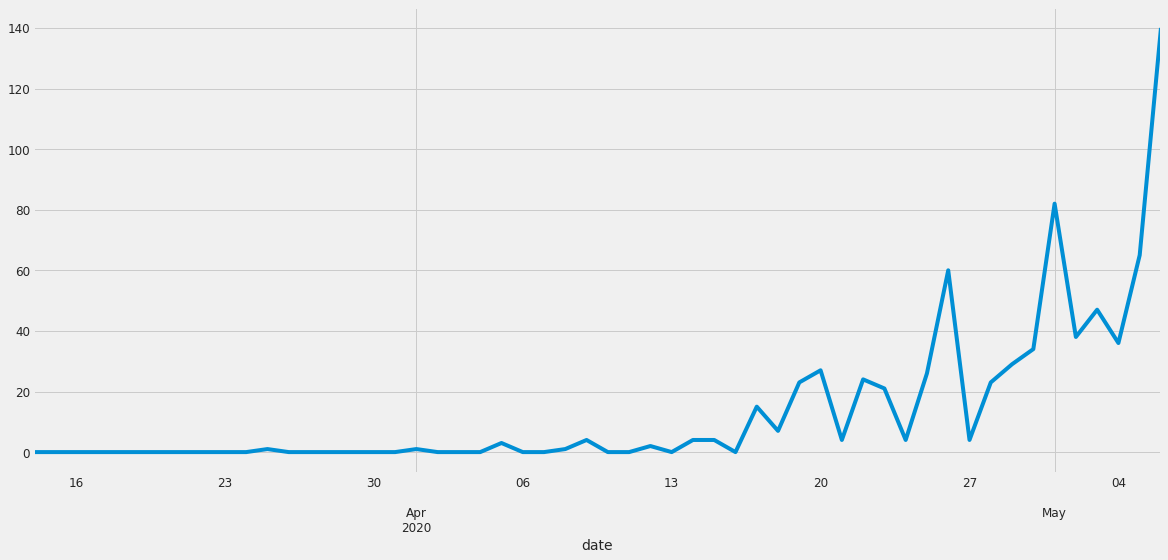

In [ ]:
y.plot()

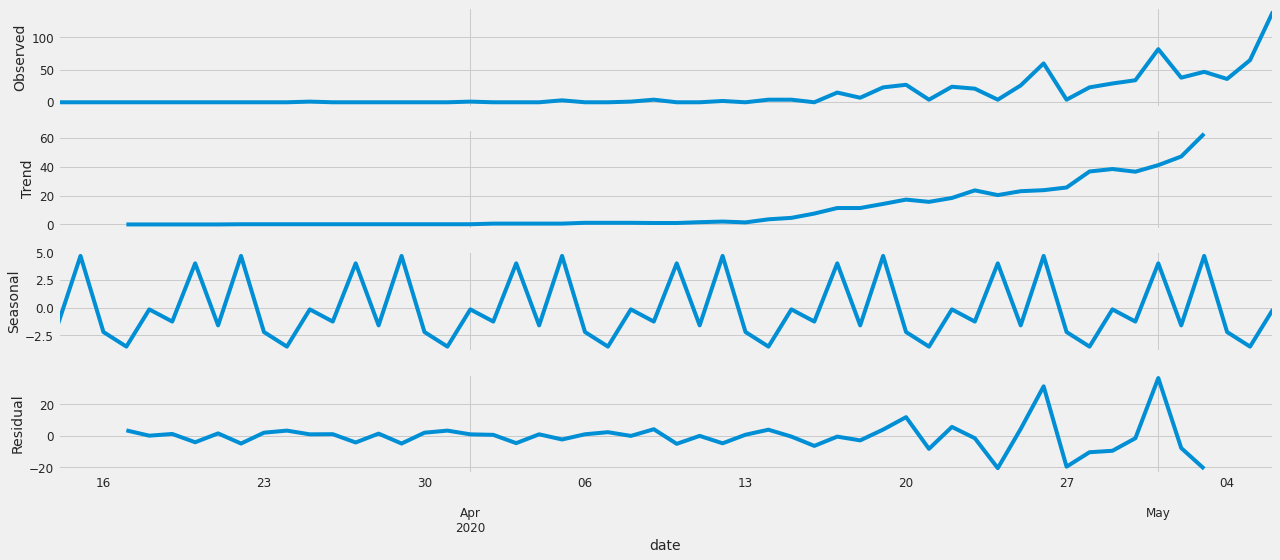

In [ ]:

#ARIMA
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1413      1.158      0.122      0.903      -2.128       2.411
ma.L1         -0.5790      1.079     -0.536      0.592      -2.695       1.537
ar.S.L12      -1.5289      0.350     -4.374      0.000      -2.214      -0.844
sigma2       543.1106    116.883      4.647      0.000     314.025     772.196


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



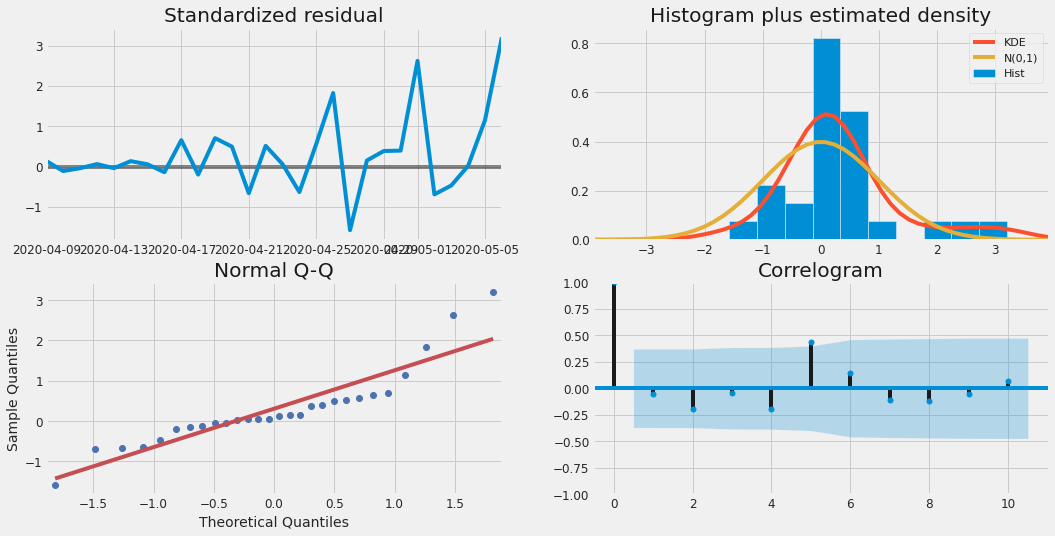

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
y_log = np.log(y)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log



In [ ]:
y_roll = y.rolling(4).mean()

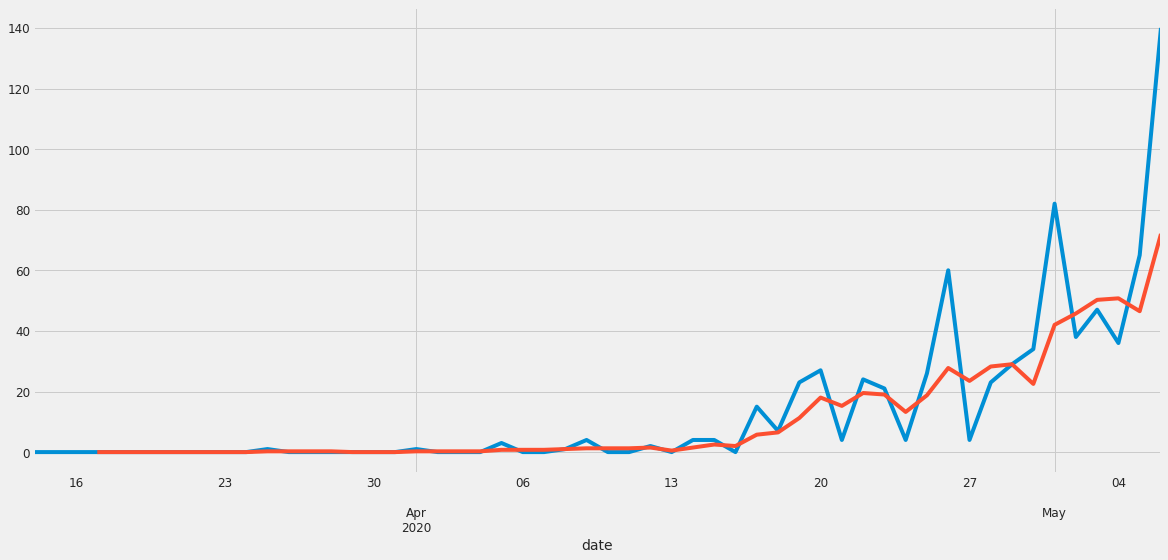

In [ ]:
y.plot()
y_roll.plot()